In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as patches
%matplotlib inline

Fossil fuels

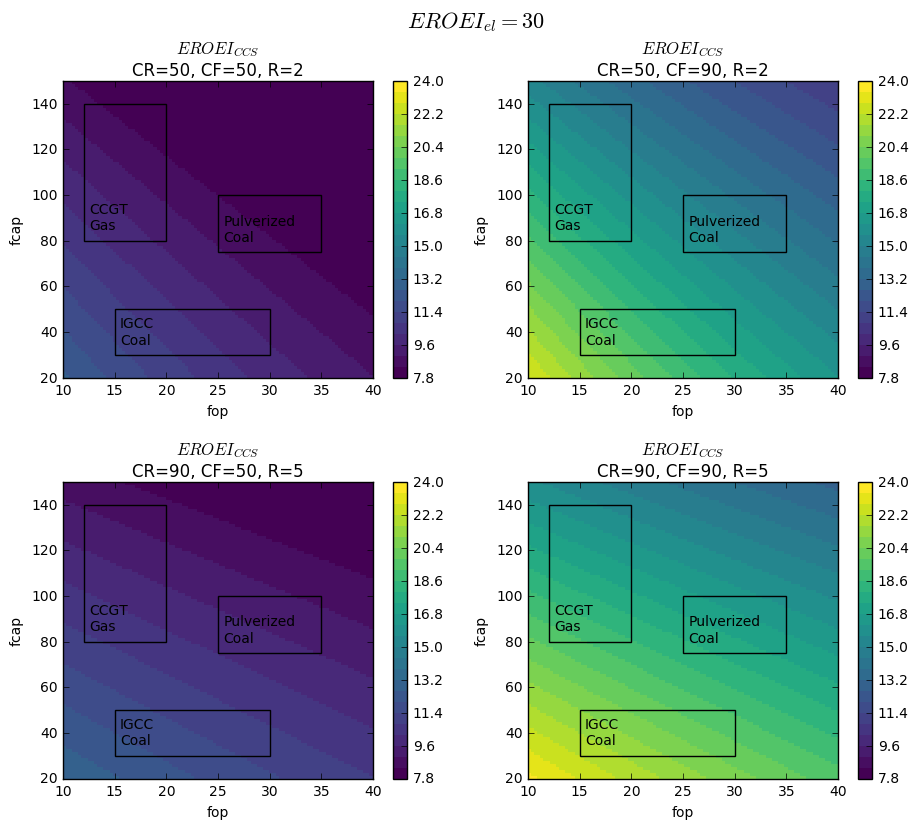

In [152]:
fop=np.linspace(10,40,100)
fcap=np.linspace(20,150,100)
eroei_el=30
CR=[50,90]
CF=[50,90]
R=[2,5]
eroei_ccs=np.zeros([len(CR),len(CF),len(fop),len(fcap)])
for i in range(len(R)):
    for j in range(len(CF)):
        for k in range(len(fop)):
            for l in range(len(fcap)):
                eroei_ccs[i][j][k,l]=(1-fop[k]/100.0)*((R[i]+1)/(R[i]+1+fcap[l]/100.0))*eroei_el*CF[j]/100.0
fig,axes=plt.subplots(2,2,figsize=(11,9))
plt.subplots_adjust(hspace=0.35)
#levels = MaxNLocator(nbins=15).tick_values(4000, 15000)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        ax=axes[i][j]
        z = eroei_ccs[i][j][:-1, :-1]
        #levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())
        levels = MaxNLocator(nbins=30).tick_values(8, 24)
        cmap = plt.get_cmap('viridis')
        norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
        im = ax.pcolormesh(fop, fcap, z, cmap=cmap, norm=norm)
        fig.colorbar(im, ax=ax)
        ax.set_xlim((fop.min(),fop.max()))
        ax.set_ylim((fcap.min(),fcap.max()))
        
        t=[12,20,80,140]
        rect = patches.Rectangle((t[0],t[2]),t[1]-t[0],t[3]-t[2],linewidth=1,edgecolor='k',facecolor='none')
        ax.add_patch(rect)
        ax.text(t[0]+0.5,t[2]+5,'CCGT\nGas')
        
        t=[25,35,75,100]
        rect = patches.Rectangle((t[0],t[2]),t[1]-t[0],t[3]-t[2],linewidth=1,edgecolor='k',facecolor='none')
        ax.add_patch(rect)
        ax.text(t[0]+0.5,t[2]+5,'Pulverized\nCoal')
        
        t=[15,30,30,50]
        rect = patches.Rectangle((t[0],t[2]),t[1]-t[0],t[3]-t[2],linewidth=1,edgecolor='k',facecolor='none')
        ax.add_patch(rect)
        ax.text(t[0]+0.5,t[2]+5,'IGCC\nCoal')
        
        ax.set_xlabel('fop')
        ax.set_ylabel('fcap')
        ax.set_title(u'$EROEI_{CCS}$\nCR='+str(CR[i])+', CF='+str(CF[j])+', R='+str(R[i]))
plt.suptitle(r'$EROEI_{el}='+str(eroei_el)+'$',fontsize=16)
plt.show()
#change CF - CF
#EROEI-el by techn - create 
#equation R- EROI-l

RE

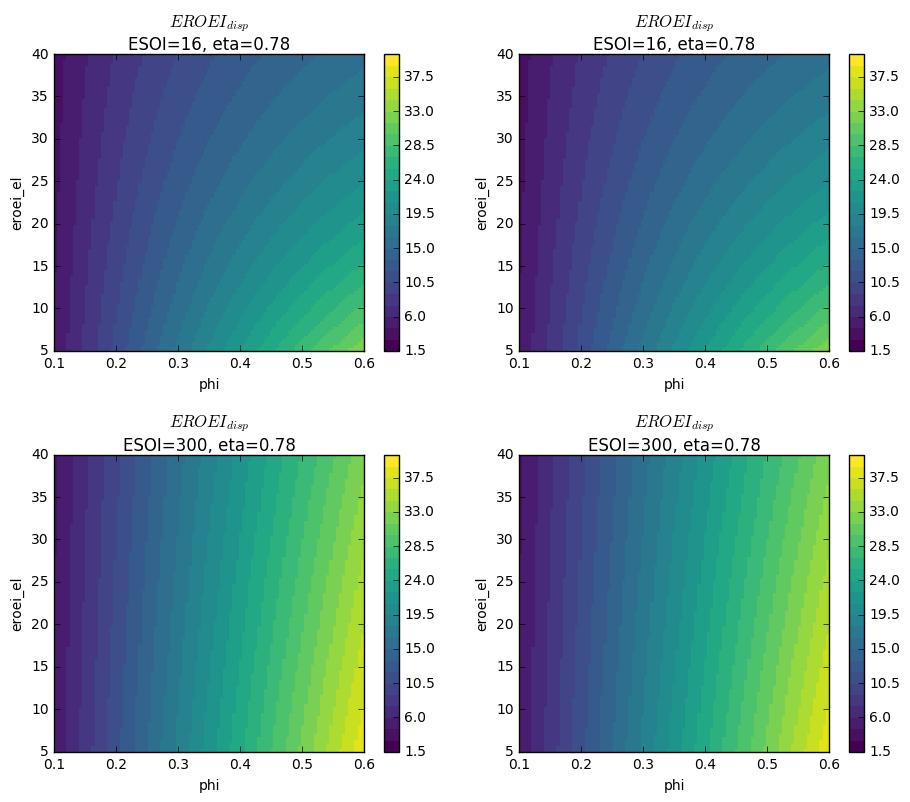

In [179]:
eroei_el=np.linspace(5,40,100)
phi=np.linspace(.10,.60,100)
ESOI=[16,300]
eta=0.78
eroei_disp=np.zeros([len(ESOI),len(phi),len(eroei_el)])
for i in range(len(ESOI)):
    for j in range(len(phi)):
        for k in range(len(eroei_el)):
            eroei_disp[i][j,k]=((1-phi[j])+(eta*phi[j]))/((1/eroei_el[k])+(eta*phi[j]/ESOI[i]))
fig,axes=plt.subplots(2,2,figsize=(11,9))
plt.subplots_adjust(hspace=0.35)
#levels = MaxNLocator(nbins=15).tick_values(4000, 15000)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        ax=axes[i][j]
        z = eroei_disp[i][:-1, :-1]
        #levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())
        levels = MaxNLocator(nbins=30).tick_values(2, 40)
        cmap = plt.get_cmap('viridis')
        norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
        im = ax.pcolormesh(phi, eroei_el, z, cmap=cmap, norm=norm)
        fig.colorbar(im, ax=ax)
        ax.set_xlim((phi.min(),phi.max()))
        ax.set_ylim((eroei_el.min(),eroei_el.max()))
        
        '''
        t=[12,20,80,140]
        rect = patches.Rectangle((t[0],t[2]),t[1]-t[0],t[3]-t[2],linewidth=1,edgecolor='k',facecolor='none')
        ax.add_patch(rect)
        ax.text(t[0]+0.5,t[2]+5,'CCGT\nGas')
        
        t=[25,35,75,100]
        rect = patches.Rectangle((t[0],t[2]),t[1]-t[0],t[3]-t[2],linewidth=1,edgecolor='k',facecolor='none')
        ax.add_patch(rect)
        ax.text(t[0]+0.5,t[2]+5,'Pulverized\nCoal')
        
        t=[15,30,30,50]
        rect = patches.Rectangle((t[0],t[2]),t[1]-t[0],t[3]-t[2],linewidth=1,edgecolor='k',facecolor='none')
        ax.add_patch(rect)
        ax.text(t[0]+0.5,t[2]+5,'IGCC\nCoal')
        '''
        ax.set_xlabel('phi')
        ax.set_ylabel('eroei_el')
        ax.set_title(u'$EROEI_{disp}$\nESOI='+str(ESOI[i])+', eta='+str(eta))
plt.show()

#transalte technology CCS PV-EROEI